<img src="https://upload.wikimedia.org/wikipedia/en/thumb/a/a0/Mega_Millions_Lottery_logo.svg/273px-Mega_Millions_Lottery_logo.svg.png" align="right"/>

# Mega Millions

### Background Information
<html>
<p>Mega Millions is an American multi-jurisdictional lottery game.</p>    
<p>On October 28, 2017, the price of a Mega Millions play doubled, to \$2; the first drawing under the current price point was October 31, 2017. The Mega Millions double matrix changed, from 5/75 + 1/15 to the current 5/70 + 1/25. The starting jackpot became \$40 million, with minimum rollovers of \$5 million. The "Megaplier" option (which again is not offered in California) was retained, with an adjustment to its multipliers. (The final jackpot for the \$1 version was \$30 million, which was not won; the initial jackpot for the new version would still be \$40 million with a jackpot hit.)</p>

<p>Mega Millions' non-California prize tiers effective October 28, 2017 (old prizes in parentheses; changed amounts in boldface) for a $2 base play:
<ul>
    <li>5+MB: Jackpot; starting jackpot raised to \$40 million (annuity value)</li>
    <li>5+0: \$1,000,000 (\$1,000,000)</li>
    <li>4+MB: \$10,000 (\$5,000)</li>
    <li>4+0: \$500 (\$500)</li>
    <li>3+MB: \$200 (\$50)</li>
    <li>3+0: \$10 (\$5)</li>
    <li>2+MB: \$10 (\$5)</li>
    <li>1+MB: \$4 (\$2)</li>
    <li>0+MB: \$2 (\$1)</li>
</ul></p>

<p>The new prize structure allocates roughly 75 percent of the prize pool for the jackpot; this is, in part, to facilitate the new Just the Jackpot option. The 2013-2017 version allocated about 68 percent towards the jackpot.</p>
</html>

### What is this notebook / kernel about?
The US Government keeps a running record and <a href="https://catalog.data.gov/dataset/lottery-mega-millions-winning-numbers-beginning-2002" target="_blank">data set available</a> where Mega Millions drawings results since 2002 are recorded and available for download in CSV format.

The goal of this notebook is to analyze that data set with a focus on results since the format rework in October 2017 to see if any trends are present and perhaps that can help us win the lottery?

### Load and Inspect Data Set

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import scipy.stats as stats


data_url = "https://catalog.data.gov/dataset/lottery-mega-millions-winning-numbers-beginning-2002"
wiki_url = "https://en.wikipedia.org/wiki/Mega_Millions"
csv_file = "Lottery_Mega_Millions_Winning_Numbers__Beginning_2002.csv"

df = pd.read_csv(csv_file)
df["Draw Date"] = pd.to_datetime(df["Draw Date"] )
df = df.sort_values(by="Draw Date")
df = df[df['Draw Date'] > "2017-10-30"]  # October 2017 format and price change - first draw on 10/31/2017
df.head()

,Draw Date,Winning Numbers,Mega Ball,Multiplier
363,2017-10-31,06 28 31 52 53,12,4.0
362,2017-11-03,10 22 42 61 69,3,2.0
361,2017-11-07,01 54 60 68 69,11,4.0
360,2017-11-10,06 23 38 42 58,24,2.0
359,2017-11-14,01 14 21 22 28,19,3.0


In [11]:
df["Winning_Number_Split"] = df["Winning Numbers"].str.split(" ")
df["w_1"] = df["Winning_Number_Split"].str.get(0).astype(int)
df["w_2"] = df["Winning_Number_Split"].str.get(1).astype(int)
df["w_3"] = df["Winning_Number_Split"].str.get(2).astype(int)
df["w_4"] = df["Winning_Number_Split"].str.get(3).astype(int)
df["w_5"] = df["Winning_Number_Split"].str.get(4).astype(int)
df.describe()

,Draw Date,Mega Ball,Multiplier,w_1,w_2,w_3,w_4,w_5
count,772,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,2021-07-11 00:00:00,13.379534,2.957254,11.335492,22.918394,34.550518,46.505181,58.547927
min,2017-10-31 00:00:00,1.000000,2.000000,1.000000,2.000000,4.000000,8.000000,17.000000
25%,2019-09-05 06:00:00,7.000000,2.000000,4.000000,14.000000,25.000000,38.000000,53.000000
50%,2021-07-11 00:00:00,13.000000,3.000000,9.000000,22.000000,34.000000,48.000000,61.000000
75%,2023-05-16 18:00:00,20.000000,4.000000,16.000000,31.000000,44.000000,57.000000,66.000000
max,2025-03-21 00:00:00,25.000000,5.000000,56.000000,66.000000,67.000000,69.000000,70.000000
std,NaN,7.254481,0.864031,9.074137,11.879194,12.865614,12.565934,10.254051


### Plotting Distribution of Winning Numbers

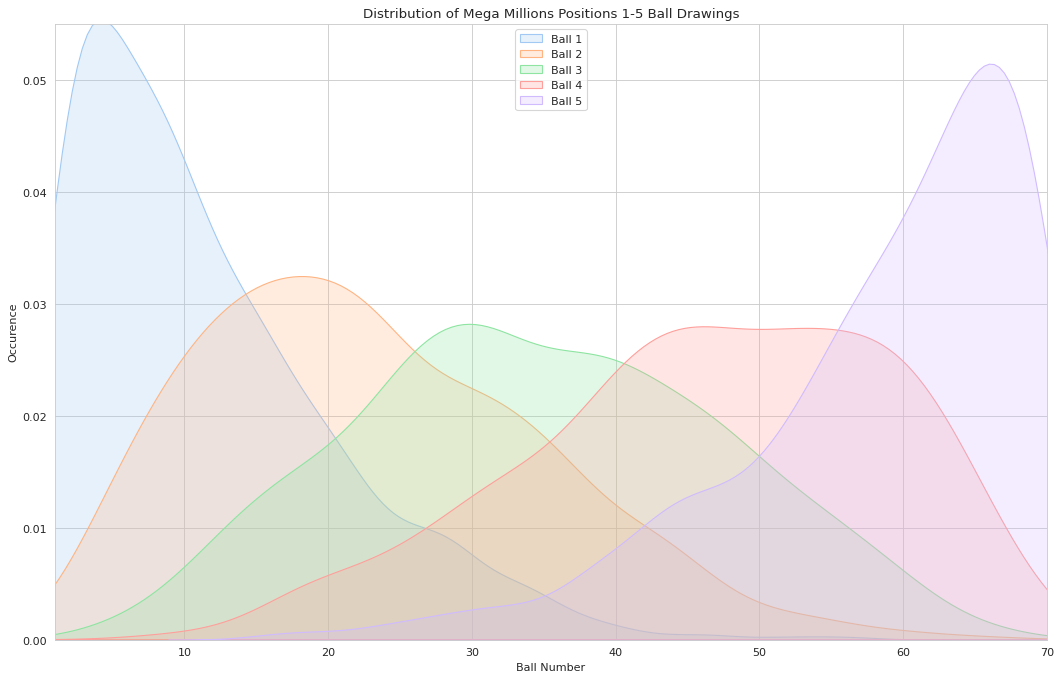

In [13]:
fig=plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.kdeplot(df["w_1"].values.tolist(), fill=True, label="Ball 1")
sns.kdeplot(df["w_2"].values.tolist(), fill=True, label="Ball 2")
sns.kdeplot(df["w_3"].values.tolist(), fill=True, label="Ball 3")
sns.kdeplot(df["w_4"].values.tolist(), fill=True, label="Ball 4")
sns.kdeplot(df["w_5"].values.tolist(), fill=True, label="Ball 5")
plt.xlabel("Ball Number")
plt.ylabel("Occurence")
plt.title("Distribution of Mega Millions Positions 1-5 Ball Drawings")
plt.xlim((1, 70))
plt.ylim((0, 0.055))
plt.legend(loc="upper center")
plt.show()

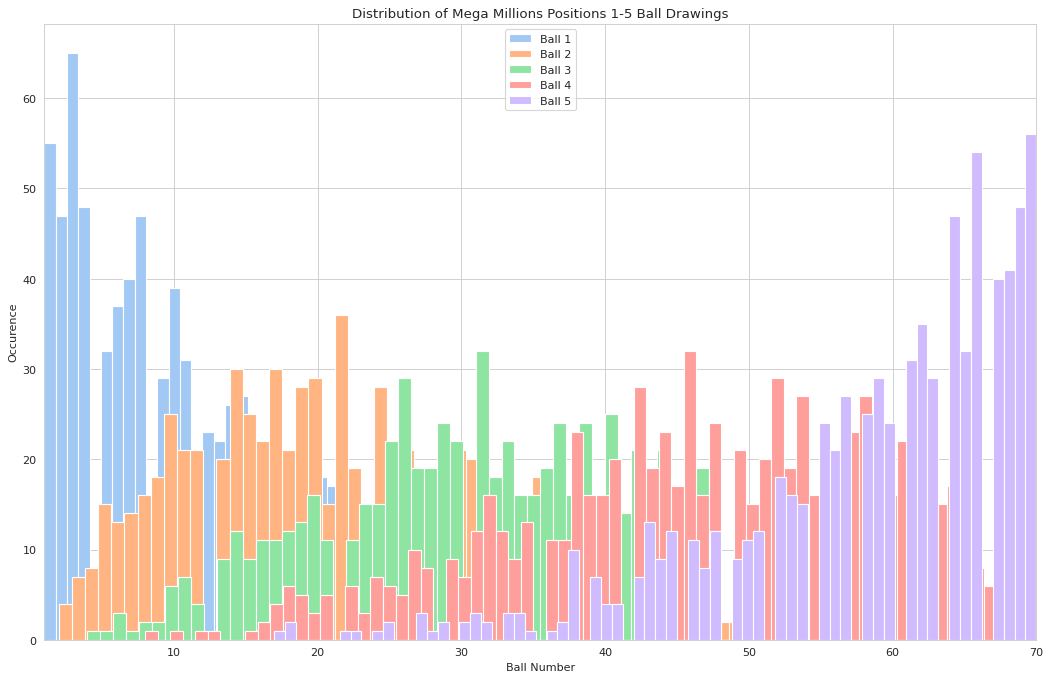

In [ ]:
fig=plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.hist(df["w_1"].values.tolist(), bins=70, label="Ball 1")
plt.hist(df["w_2"].values.tolist(), bins=70, label="Ball 2")
plt.hist(df["w_3"].values.tolist(), bins=70, label="Ball 3")
plt.hist(df["w_4"].values.tolist(), bins=70, label="Ball 4")
plt.hist(df["w_5"].values.tolist(), bins=70, label="Ball 5")
plt.xlabel("Ball Number")
plt.ylabel("Occurence")
plt.title("Distribution of Mega Millions Positions 1-5 Ball Drawings")
plt.xlim((1, 70))
#plt.ylim((0, 0.055))
plt.legend(loc="upper center")
plt.show()

#TODO Stacked bars for number draws

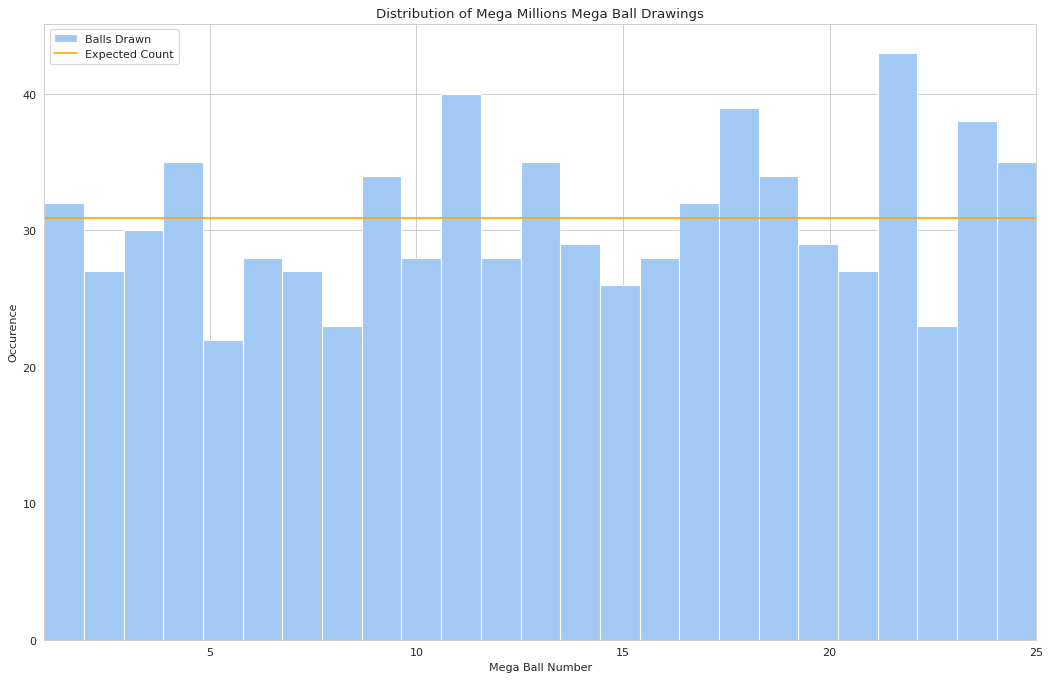

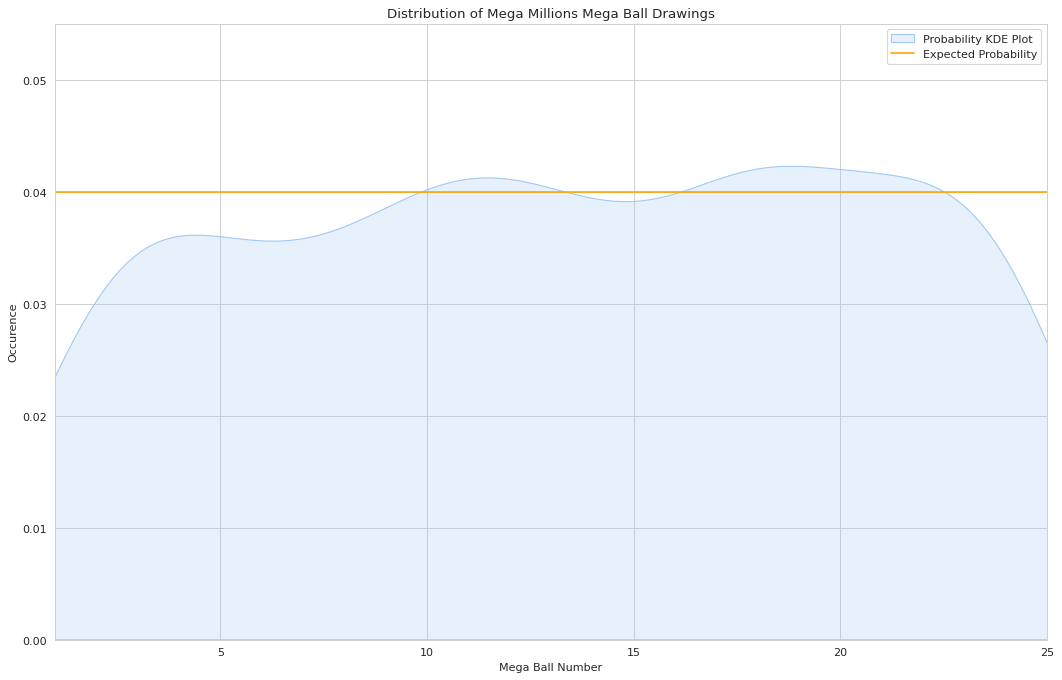

In [18]:
fig=plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.hist(df["Mega Ball"].values.tolist(), bins=25, label="Balls Drawn")
plt.plot(list(range(1,26)), np.ones(25)*df["Mega Ball"].count()/25.0, label="Expected Count", color="orange")
plt.xlabel("Mega Ball Number")
plt.ylabel("Occurence")
plt.title("Distribution of Mega Millions Mega Ball Drawings")
plt.xlim((1, 25))
plt.legend()
plt.show()

fig=plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.kdeplot(df["Mega Ball"].values.tolist(), fill=True, label="Probability KDE Plot")
plt.plot(list(range(1,26)), np.ones(25)/25.0, label="Expected Probability", color="orange")
plt.xlabel("Mega Ball Number")
plt.ylabel("Occurence")
plt.title("Distribution of Mega Millions Mega Ball Drawings")
plt.xlim((1, 25))
plt.ylim((0, 0.055))
plt.legend()
plt.show()

In [22]:
balls = list(range(1,71))  # valid ball draws are 1-70
megas = list(range(1,26))  # valid mega ball draws are 1-25

ball_draws = [df["w_1"],df["w_2"],df["w_3"],df["w_4"],df["w_5"]]
pdf_norm = []
pdf_gamma = []
pdf_beta = []
pdf_skew = []
pdf_lognorm = []
pdf_uniform = []
pdf_expon = []

for d_idx in range(0,5):
    data = ball_draws[d_idx]
    mu, sigma = stats.norm.fit(data)
    pdf_norm.append(stats.norm.pdf(balls, mu, sigma))
    
    ag,bg,cg = stats.gamma.fit(data)  
    pdf_gamma.append(stats.gamma.pdf(balls, ag, bg,cg))

    ab,bb,cb,db = stats.beta.fit(data)  
    pdf_beta.append(stats.beta.pdf(balls, ab, bb,cb, db))
    
    ae, loce, scalee = stats.skewnorm.fit(data)
    pdf_skew.append(stats.skewnorm.pdf(balls,ae, loce, scalee))
    
    shape, loc, scale = stats.lognorm.fit(data, floc=0)
    pdf_lognorm.append(stats.lognorm.pdf(balls, shape, loc, scale))
    
    pdf_uniform.append(1.0 / (max(balls)-min(balls))*np.ones(len(balls)))
    
    locx, scalex = stats.expon.fit(data)
    pdf_expon.append(stats.expon.pdf(balls, loc=locx, scale=scalex))

data = df["Mega Ball"]
mu, sigma = stats.norm.fit(data)
pdf_norm.append(stats.norm.pdf(megas, mu, sigma))
ag,bg,cg = stats.gamma.fit(data)  
pdf_gamma.append(stats.gamma.pdf(megas, ag, bg,cg))
ab,bb,cb,db = stats.beta.fit(data)  
pdf_beta.append(stats.beta.pdf(megas, ab, bb,cb, db))
ae, loce, scalee = stats.skewnorm.fit(data)
pdf_skew.append(stats.skewnorm.pdf(megas,ae, loce, scalee))
shape, loc, scale = stats.lognorm.fit(data, floc=0)
pdf_lognorm.append(stats.lognorm.pdf(megas, shape, loc, scale))
pdf_uniform.append(1.0 / (max(megas)-min(megas))*np.ones(len(megas)))
locx, scalex = stats.expon.fit(data)
pdf_expon.append(stats.expon.pdf(megas, loc=locx, scale=scalex))

In [23]:
shape, loc, scale = stats.lognorm.fit(data, floc=0)
print(shape)
print(loc)
print(scale)

oo = stats.lognorm(shape, loc, scale)
op = stats.skewnorm()
print(round(oo.rvs()))
print(round(oo.rvs()))
print(round(oo.rvs()))
print(round(oo.rvs()))
print(round(oo.rvs()))
print(round(oo.rvs()))
print(round(oo.rvs()))

0.818588193974857
0
10.51264235130596


TypeError: _parse_args() missing 1 required positional argument: 'a'

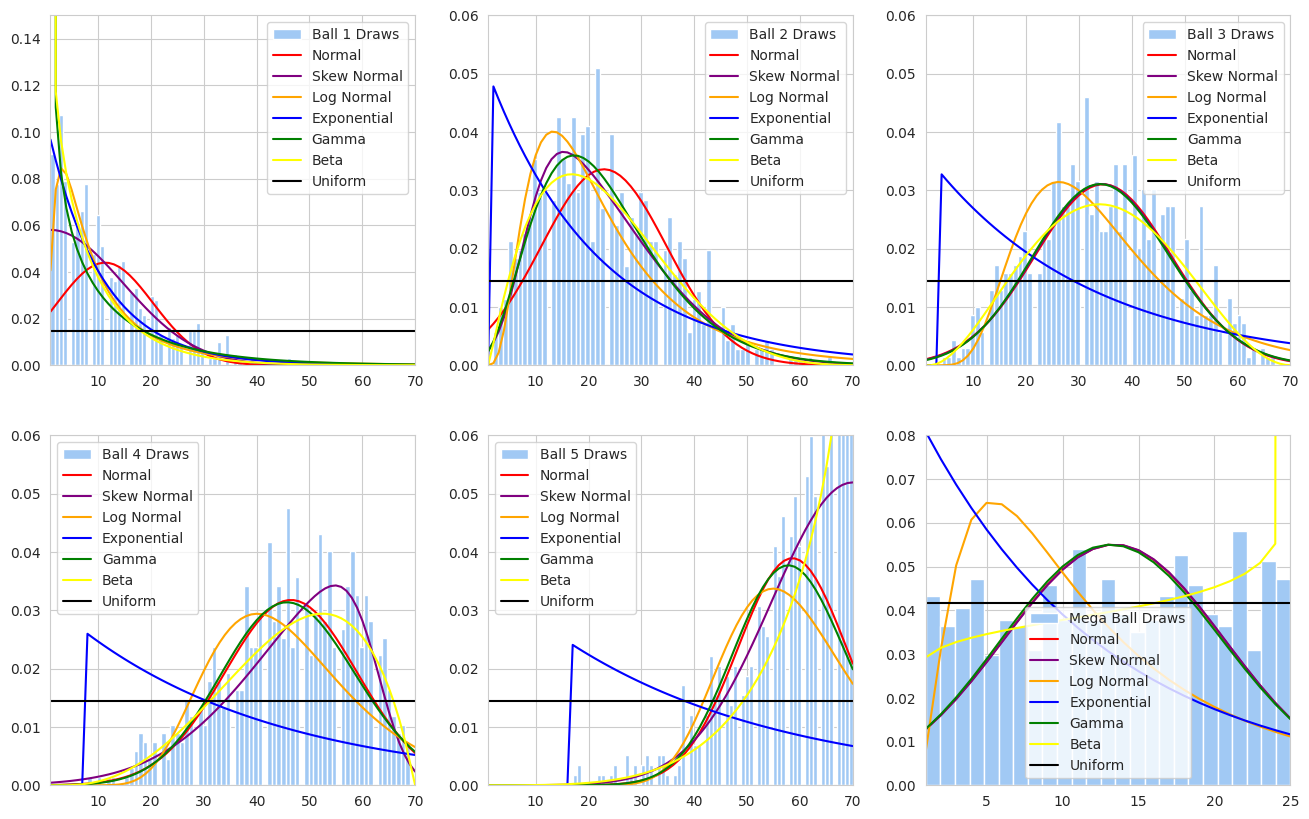

In [24]:
fig, ax = plt.subplots(2,3,figsize=(16,10))
ax[0,0].hist(df["w_1"], density=True, bins=70, label="Ball 1 Draws") 
ax[0,0].plot(balls, pdf_norm[0], color="red", label="Normal")
ax[0,0].plot(balls, pdf_skew[0], color="purple", label="Skew Normal")
ax[0,0].plot(balls, pdf_lognorm[0], color="orange", label="Log Normal")
ax[0,0].plot(balls, pdf_expon[0], color="blue", label="Exponential")
ax[0,0].plot(balls, pdf_gamma[0], color="green", label="Gamma")
ax[0,0].plot(balls, pdf_beta[0], color="yellow", label="Beta")
ax[0,0].plot(balls, pdf_uniform[0], color="black", label="Uniform")
ax[0,0].set_ylim(0,0.15)
ax[0,0].set_xlim(min(balls),max(balls))
ax[0,0].legend()
  
ax[0,1].hist(df["w_2"], density=True, bins=70, label="Ball 2 Draws")
ax[0,1].plot(balls, pdf_norm[1], color="red", label="Normal")
ax[0,1].plot(balls, pdf_skew[1], color="purple", label="Skew Normal")
ax[0,1].plot(balls, pdf_lognorm[1], color="orange", label="Log Normal")
ax[0,1].plot(balls, pdf_expon[1], color="blue", label="Exponential")
ax[0,1].plot(balls, pdf_gamma[1], color="green", label="Gamma")
ax[0,1].plot(balls, pdf_beta[1], color="yellow", label="Beta")
ax[0,1].plot(balls, pdf_uniform[1], color="black", label="Uniform")
ax[0,1].set_ylim(0,0.06)
ax[0,1].set_xlim(min(balls),max(balls))
ax[0,1].legend()

ax[0,2].hist(df["w_3"], density=True, bins=70, label="Ball 3 Draws")
ax[0,2].plot(balls, pdf_norm[2], color="red", label="Normal")
ax[0,2].plot(balls, pdf_skew[2], color="purple", label="Skew Normal")
ax[0,2].plot(balls, pdf_lognorm[2], color="orange", label="Log Normal")
ax[0,2].plot(balls, pdf_expon[2], color="blue", label="Exponential")
ax[0,2].plot(balls, pdf_gamma[2], color="green", label="Gamma")
ax[0,2].plot(balls, pdf_beta[2], color="yellow", label="Beta")
ax[0,2].plot(balls, pdf_uniform[2], color="black", label="Uniform")
ax[0,2].set_ylim(0,0.06)
ax[0,2].set_xlim(min(balls),max(balls))
ax[0,2].legend()

ax[1,0].hist(df["w_4"], density=True, bins=70, label="Ball 4 Draws")
ax[1,0].plot(balls, pdf_norm[3], color="red", label="Normal")
ax[1,0].plot(balls, pdf_skew[3], color="purple", label="Skew Normal")
ax[1,0].plot(balls, pdf_lognorm[3], color="orange", label="Log Normal")
ax[1,0].plot(balls, pdf_expon[3], color="blue", label="Exponential")
ax[1,0].plot(balls, pdf_gamma[3], color="green", label="Gamma")
ax[1,0].plot(balls, pdf_beta[3], color="yellow", label="Beta")
ax[1,0].plot(balls, pdf_uniform[3], color="black", label="Uniform")
ax[1,0].set_ylim(0,0.06)
ax[1,0].set_xlim(min(balls),max(balls))
ax[1,0].legend()

ax[1,1].hist(df["w_5"], density=True, bins=70, label="Ball 5 Draws")
ax[1,1].plot(balls, pdf_norm[4], color="red", label="Normal")
ax[1,1].plot(balls, pdf_skew[4], color="purple", label="Skew Normal")
ax[1,1].plot(balls, pdf_lognorm[4], color="orange", label="Log Normal")
ax[1,1].plot(balls, pdf_expon[4], color="blue", label="Exponential")
ax[1,1].plot(balls, pdf_gamma[4], color="green", label="Gamma")
ax[1,1].plot(balls, pdf_beta[4], color="yellow", label="Beta")
ax[1,1].plot(balls, pdf_uniform[4], color="black", label="Uniform")
ax[1,1].set_ylim(0,0.06)
ax[1,1].set_xlim(min(balls),max(balls))
ax[1,1].legend()

ax[1,2].hist(df["Mega Ball"], density=True, bins=25, label="Mega Ball Draws")
ax[1,2].plot(megas, pdf_norm[5], color="red", label="Normal")
ax[1,2].plot(megas, pdf_skew[5], color="purple", label="Skew Normal")
ax[1,2].plot(megas, pdf_lognorm[5], color="orange", label="Log Normal")
ax[1,2].plot(megas, pdf_expon[5], color="blue", label="Exponential")
ax[1,2].plot(megas, pdf_gamma[5], color="green", label="Gamma")
ax[1,2].plot(megas, pdf_beta[5], color="yellow", label="Beta")
ax[1,2].plot(megas, pdf_uniform[5], color="black", label="Uniform")
ax[1,2].set_ylim(0,0.08)
ax[1,2].set_xlim(min(megas),max(megas))
ax[1,2].legend()
plt.show()

## Goodness of Fit
https://en.wikipedia.org/wiki/Goodness_of_fit

In assessing whether a given distribution is suited to a data-set, the following hypothesis tests and their underlying measures of fit can be used:

    Kolmogorov–Smirnov test
    Cramér–von Mises criterion
    Anderson–Darling test
    Shapiro–Wilk test
    Chi-squared test
    Akaike information criterion
    Hosmer–Lemeshow test
    Kuiper's test
    kernelized Stein discrepancy
    Zhang's ZK, ZC and ZA tests
    Moran test

In [9]:
from skgof import ks_test, cvm_test, ad_test

/opt/anaconda/lib/python3.7/site-packages/skgof/vect.py:58: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return stack(arange(s, s + count) for s in starts)


In [10]:
# https://pypi.org/project/scikit-gof/

## Weighted Prediction Methodology

## Sandbox

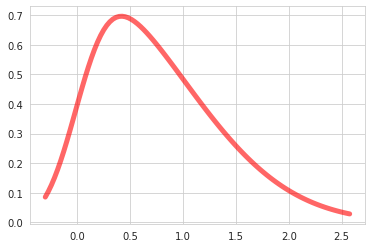

In [11]:
from scipy.stats import skewnorm  # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewnorm.html  
fig2, ax2 = plt.subplots(1, 1)
a = 4
x = np.linspace(skewnorm.ppf(0.01, a), skewnorm.ppf(0.99, a), 100)
ax2.plot(x, skewnorm.pdf(x, a),'r-', lw=5, alpha=0.6, label='skewnorm pdf')
a = 4
mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk') 

In [12]:
print(df["w_1"].to_list())
rv = skewnorm(df["w_1"].to_list(),4)
x = np.array(list((range(1,26))))
print(x)
#print(rv.pdf(x))
#plt.plot(x, rv.pdf(x), 'k-', label='frozen pdf')

[6, 10, 1, 6, 1, 3, 3, 16, 10, 16, 14, 6, 8, 4, 28, 1, 10, 4, 1, 28, 16, 17, 3, 3, 2, 10, 29, 1, 14, 28, 5, 14, 17, 7, 10, 24, 1, 7, 6, 1, 14, 4, 7, 11, 4, 16, 5, 8, 12, 1, 3, 2, 2, 4, 8, 14, 21, 9, 16, 11, 2, 5, 22, 14, 1, 1, 11, 2, 17, 2, 13, 2, 1, 21, 40, 1, 1, 1, 12, 9, 2, 1, 11, 1, 14, 1, 3, 7, 2, 8, 15, 23, 31, 1, 8, 39, 27, 2, 20, 4, 3, 15, 5, 1, 20, 3, 28, 8, 34, 33, 10, 7, 12, 25, 28, 4, 4, 5, 13, 10, 2, 9, 34, 21, 13, 4, 29, 2, 4, 8, 10, 2, 3, 14, 15, 10, 17, 18, 10, 29, 15, 4, 10, 3, 10, 7, 4, 5, 33, 8, 11, 1, 11, 18, 7, 9, 24, 8, 3, 3, 11, 5, 10, 14, 9, 7, 25, 17, 20, 19, 12, 13, 24, 2, 3, 6, 12, 8, 8, 16, 1, 4, 10, 11, 11, 15, 7, 4, 8, 11, 8, 3, 13, 4, 34, 6, 12, 23, 6, 12, 10, 11, 5, 14, 4, 18, 5, 16, 4, 9, 2, 3, 19, 12, 22, 7, 8, 6, 23, 20, 18, 17, 22, 3]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]


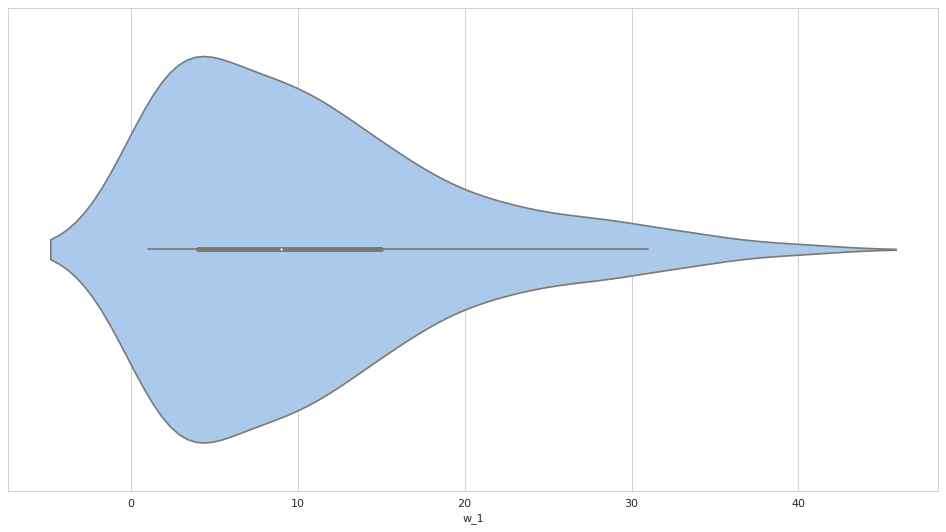

In [13]:
fig=plt.figure(figsize=(15, 8), dpi= 80, facecolor='w', edgecolor='k')
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.violinplot(data=df, x="w_1", shade=True)

# would need to change data frame so that only one winning number appears per row along with a designator (e.g. w_1 or m_b) to cleanly put all violins on one plot
